In [397]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functions import get_datasets, get_target_id
import glob
import os
from q_value_calc_crosslinks import calcQ
import re

In [398]:
i = 1
class_threshold = 500
dataset = get_datasets()
output_path = f"../results/{dataset[i]['type']}/{dataset[i]['name']}/{class_threshold}/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [399]:
# read original and additional file
input_path = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/"
input_file_original = input_path + f"{dataset[i]['file']}_filtered.pkl"
input_file_perc =  input_path + f"{dataset[i]['file']}_{dataset[i]['comparison']}_filtered.pkl"

df_original = pd.read_pickle(input_file_original)
if dataset[i]['comparison'] != None:
    df_perc = pd.read_pickle(input_file_perc)

## Default

In [400]:
# read default svm files
input_path += f"{class_threshold}/"
input_path += "default/filtered/"
svm_files = [filename for filename in os.listdir(input_path) if filename.endswith(".pkl")]
# read default svm dataframes
dfs_svm = []
for svm_file in svm_files:
    dfs_svm.append(pd.read_pickle(input_path + f"/{svm_file}"))

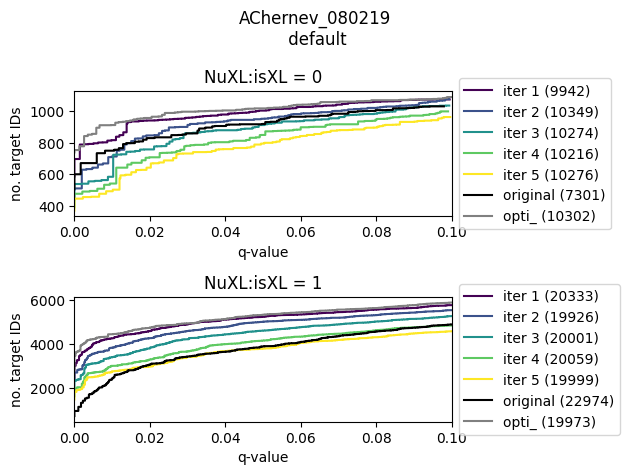

In [401]:
# plot default svm results
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,5)))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    for k, df_svm in enumerate(dfs_svm):
        axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), q_val],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), 'cum_target_id'], label=f"iter {k + 1} ({len(df_svm[df_svm[dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(f"{dataset[i]['name']}\n default")
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_default.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Peptide unique

In [402]:
# read unique peptide svm files
input_path = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/{class_threshold}/pep_unique/filtered/"
dfs_svm_peptide = []
svm_files = [filename for filename in os.listdir(input_path) if filename.endswith(".pkl")]
def extract_iter_number(file_name):
    match = re.search(r'_iter_(\d+)_', file_name)
    return int(match.group(1)) if match else 0
svm_files = sorted(svm_files, key=extract_iter_number)
for svm_file in svm_files:
    print(svm_file)
    dfs_svm_peptide.append(pd.read_pickle(input_path + f"{svm_file}"))
if dataset[i]['comparison'] != None:
    df_perc = pd.read_pickle(input_file_perc)

AChernev_080219_HeLa_RNA_UV_SVM_iter_1_pep.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_2_pep.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_3_pep.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_4_pep.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_5_pep.pkl


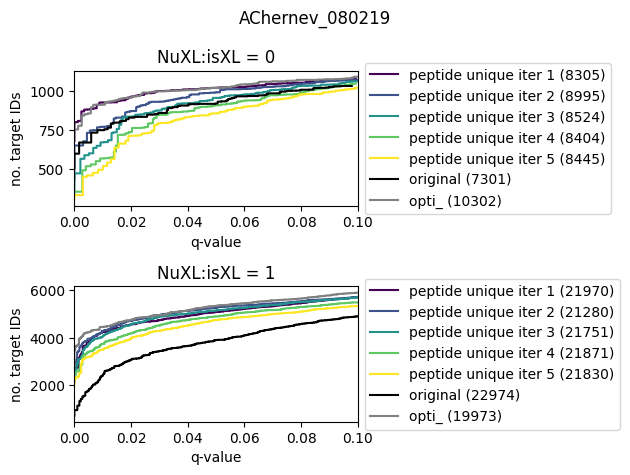

In [403]:
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(dfs_svm_peptide))))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    for k, df_svm in enumerate(dfs_svm_peptide):
        axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), q_val],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), 'cum_target_id'], label=f"peptide unique iter {k + 1} ({len(df_svm[df_svm[dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(dataset[i]['name'])
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_peptide_unique.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Decoy Choice

### Decoy second

In [404]:
# read unique peptide svm files
input_path = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/{class_threshold}/default/decoy_second/filtered/"
dfs_svm_second_decoy = []
svm_files = [filename for filename in os.listdir(input_path) if filename.endswith(".pkl")]
def extract_iter_number(file_name):
    match = re.search(r'_iter_(\d+)_', file_name)
    return int(match.group(1)) if match else 0
svm_files = sorted(svm_files, key=extract_iter_number)
for svm_file in svm_files:
    print(svm_file)
    dfs_svm_second_decoy.append(pd.read_pickle(input_path + f"{svm_file}"))
if dataset[i]['comparison'] != None:
    df_perc = pd.read_pickle(input_file_perc)

AChernev_080219_HeLa_RNA_UV_SVM_iter_1.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_2.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_3.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_4.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_5.pkl


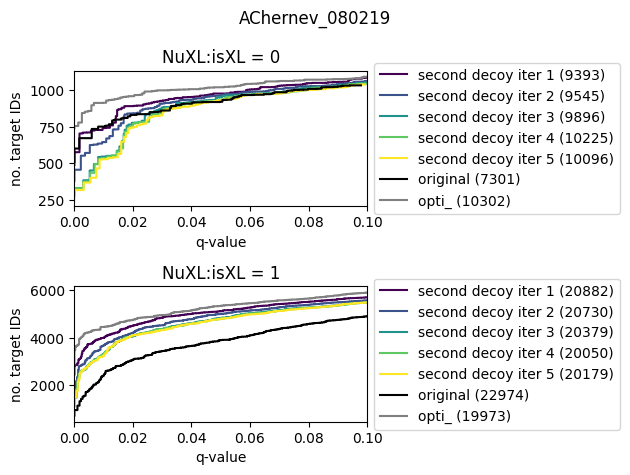

In [405]:
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(dfs_svm_second_decoy))))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    for k, df_svm in enumerate(dfs_svm_second_decoy):
        axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), q_val],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), 'cum_target_id'], label=f"second decoy iter {k + 1} ({len(df_svm[df_svm[dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(dataset[i]['name'])
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_second_decoy.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### Decoy Last

In [406]:
# read unique peptide svm files
input_path = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/{class_threshold}/default/decoy_last/filtered/"
dfs_svm_last = []
svm_files = [filename for filename in os.listdir(input_path) if filename.endswith(".pkl")]
def extract_iter_number(file_name):
    match = re.search(r'_iter_(\d+)_', file_name)
    return int(match.group(1)) if match else 0
svm_files = sorted(svm_files, key=extract_iter_number)
for svm_file in svm_files:
    print(svm_file)
    dfs_svm_last.append(pd.read_pickle(input_path + f"{svm_file}"))
if dataset[i]['comparison'] != None:
    df_perc = pd.read_pickle(input_file_perc)

AChernev_080219_HeLa_RNA_UV_SVM_iter_1.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_2.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_3.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_4.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_5.pkl


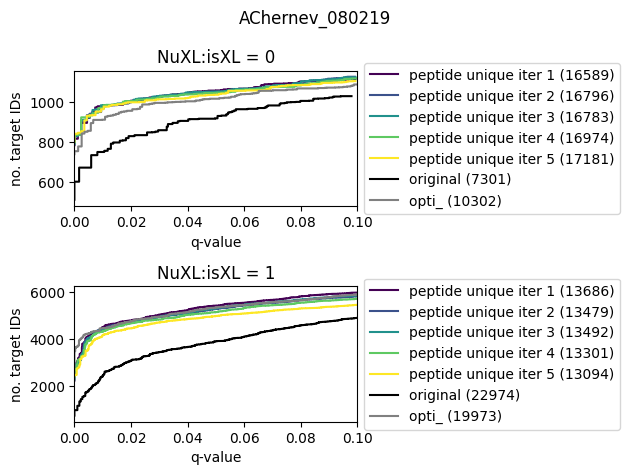

In [407]:
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(dfs_svm_last))))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    for k, df_svm in enumerate(dfs_svm_last):
        axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), q_val],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), 'cum_target_id'], label=f"peptide unique iter {k + 1} ({len(df_svm[df_svm[dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(dataset[i]['name'])
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_last.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### Decoy Bottom+Last

In [408]:
# read unique peptide svm files
input_path = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/{class_threshold}/default/decoy_bottom+last/filtered/"
dfs_svm_bottom_last = []
svm_files = [filename for filename in os.listdir(input_path) if filename.endswith(".pkl")]
def extract_iter_number(file_name):
    match = re.search(r'_iter_(\d+)_', file_name)
    return int(match.group(1)) if match else 0
svm_files = sorted(svm_files, key=extract_iter_number)
for svm_file in svm_files:
    print(svm_file)
    dfs_svm_bottom_last.append(pd.read_pickle(input_path + f"{svm_file}"))
if dataset[i]['comparison'] != None:
    df_perc = pd.read_pickle(input_file_perc)

AChernev_080219_HeLa_RNA_UV_SVM_iter_1.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_2.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_3.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_4.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_5.pkl


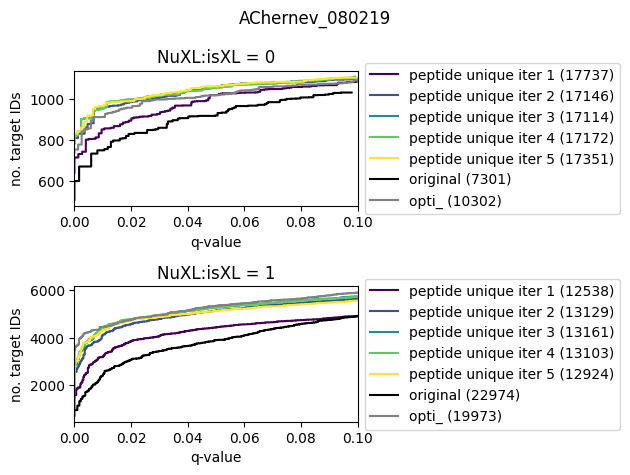

In [409]:
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(dfs_svm_last))))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    for k, df_svm in enumerate(dfs_svm_bottom_last):
        axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), q_val],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), 'cum_target_id'], label=f"peptide unique iter {k + 1} ({len(df_svm[df_svm[dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(dataset[i]['name'])
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_bottom+last.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### Decoy Bottom+second

In [410]:
# read unique peptide svm files
input_path = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/{class_threshold}/default/decoy_bottom+second/filtered/"
dfs_svm_bottom_second = []
svm_files = [filename for filename in os.listdir(input_path) if filename.endswith(".pkl")]
def extract_iter_number(file_name):
    match = re.search(r'_iter_(\d+)_', file_name)
    return int(match.group(1)) if match else 0
svm_files = sorted(svm_files, key=extract_iter_number)
for svm_file in svm_files:
    print(svm_file)
    dfs_svm_bottom_second.append(pd.read_pickle(input_path + f"{svm_file}"))
if dataset[i]['comparison'] != None:
    df_perc = pd.read_pickle(input_file_perc)

AChernev_080219_HeLa_RNA_UV_SVM_iter_1.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_2.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_3.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_4.pkl
AChernev_080219_HeLa_RNA_UV_SVM_iter_5.pkl


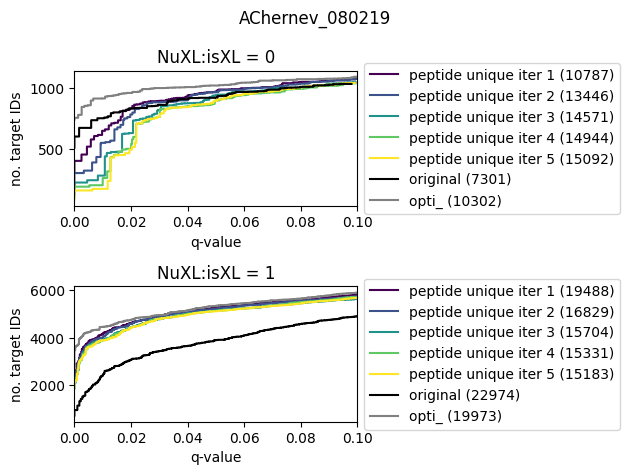

In [411]:
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(dfs_svm_last))))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    for k, df_svm in enumerate(dfs_svm_bottom_second):
        axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), q_val],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm[q_val]<= 0.1), 'cum_target_id'], label=f"peptide unique iter {k + 1} ({len(df_svm[df_svm[dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(dataset[i]['name'])
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_bottom+last.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### Comparison Decoy Choice

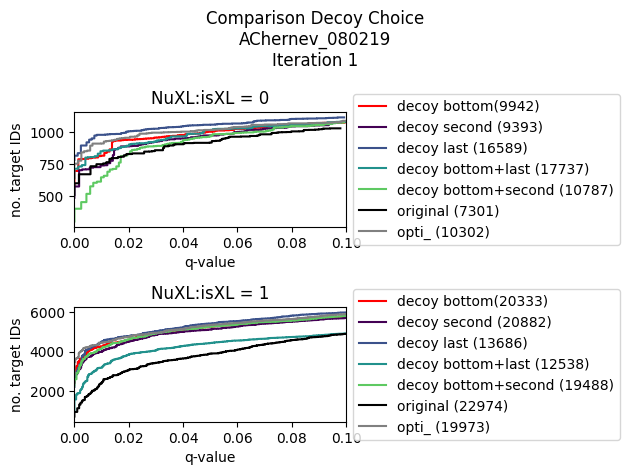

In [412]:
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(dfs_svm_peptide))))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    axs[j].step(dfs_svm[0].loc[(dfs_svm[0][dataset[i]['group']]== j) & (dfs_svm[0][q_val]<= 0.1), q_val],dfs_svm[0].loc[(dfs_svm[0][dataset[i]['group']]== j) & (dfs_svm[0][q_val]<= 0.1), 'cum_target_id'], color = "red", label=f"decoy bottom({len(dfs_svm[0][dfs_svm[0][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_second_decoy[0].loc[(dfs_svm_second_decoy[0][dataset[i]['group']]== j) & (dfs_svm_second_decoy[0][q_val]<= 0.1), q_val],dfs_svm_second_decoy[0].loc[(dfs_svm_second_decoy[0][dataset[i]['group']]== j) & (dfs_svm_second_decoy[0][q_val]<= 0.1), 'cum_target_id'], label=f"decoy second ({len(dfs_svm_second_decoy[0][dfs_svm_second_decoy[0][dataset[i]['group']]== j])})")
    #axs[j].step(dfs_svm_peptide[0].loc[(dfs_svm_peptide[0][dataset[i]['group']]== j) & (dfs_svm_peptide[0][q_val]<= 0.1), q_val],dfs_svm_peptide[0].loc[(dfs_svm_peptide[0][dataset[i]['group']]== j) & (dfs_svm_peptide[0][q_val]<= 0.1), 'cum_target_id'], label=f"peptide iter 1 ({len(dfs_svm_peptide[0][dfs_svm_peptide[0][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_last[0].loc[(dfs_svm_last[0][dataset[i]['group']]== j) & (dfs_svm_last[0][q_val]<= 0.1), q_val],dfs_svm_last[0].loc[(dfs_svm_last[0][dataset[i]['group']]== j) & (dfs_svm_last[0][q_val]<= 0.1), 'cum_target_id'], label=f"decoy last ({len(dfs_svm_last[0][dfs_svm_last[0][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_bottom_last[0].loc[(dfs_svm_bottom_last[0][dataset[i]['group']]== j) & (dfs_svm_bottom_last[0][q_val]<= 0.1), q_val],dfs_svm_bottom_last[0].loc[(dfs_svm_bottom_last[0][dataset[i]['group']]== j) & (dfs_svm_bottom_last[0][q_val]<= 0.1), 'cum_target_id'], label=f"decoy bottom+last ({len(dfs_svm_bottom_last[0][dfs_svm_bottom_last[0][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_bottom_second[0].loc[(dfs_svm_bottom_second[0][dataset[i]['group']]== j) & (dfs_svm_bottom_second[0][q_val]<= 0.1), q_val],dfs_svm_bottom_second[0].loc[(dfs_svm_bottom_second[0][dataset[i]['group']]== j) & (dfs_svm_bottom_second[0][q_val]<= 0.1), 'cum_target_id'], label=f"decoy bottom+second ({len(dfs_svm_bottom_second[0][dfs_svm_bottom_second[0][dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
tit = fig.suptitle(f"Comparison Decoy Choice\n{dataset[i]['name']}\nIteration 1")
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_comparison_decoy_choice_iter_1.png",bbox_extra_artists=(lgd,tit), bbox_inches='tight')
plt.show()

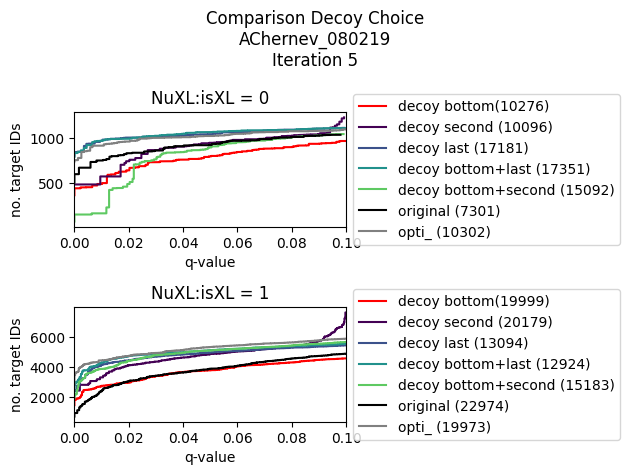

In [413]:
q_val = 'class-specific_q-val'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(dfs_svm_peptide))))
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    axs[j].step(dfs_svm[-1].loc[(dfs_svm[-1][dataset[i]['group']]== j) & (dfs_svm[-1][q_val]<= 0.1), q_val],dfs_svm[-1].loc[(dfs_svm[-1][dataset[i]['group']]== j) & (dfs_svm[-1][q_val]<= 0.1), 'cum_target_id'], color = "red", label=f"decoy bottom({len(dfs_svm[-1][dfs_svm[-1][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_second_decoy[-1].loc[(dfs_svm_second_decoy[0][dataset[i]['group']]== j) & (dfs_svm_second_decoy[-1][q_val]<= 0.1), q_val],dfs_svm_second_decoy[0].loc[(dfs_svm_second_decoy[0][dataset[i]['group']]== j) & (dfs_svm_second_decoy[-1][q_val]<= 0.1), 'cum_target_id'], label=f"decoy second ({len(dfs_svm_second_decoy[-1][dfs_svm_second_decoy[-1][dataset[i]['group']]== j])})")
    #axs[j].step(dfs_svm_peptide[0].loc[(dfs_svm_peptide[0][dataset[i]['group']]== j) & (dfs_svm_peptide[0][q_val]<= 0.1), q_val],dfs_svm_peptide[0].loc[(dfs_svm_peptide[0][dataset[i]['group']]== j) & (dfs_svm_peptide[0][q_val]<= 0.1), 'cum_target_id'], label=f"peptide iter 1 ({len(dfs_svm_peptide[0][dfs_svm_peptide[0][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_last[-1].loc[(dfs_svm_last[-1][dataset[i]['group']]== j) & (dfs_svm_last[-1][q_val]<= 0.1), q_val],dfs_svm_last[-1].loc[(dfs_svm_last[-1][dataset[i]['group']]== j) & (dfs_svm_last[-1][q_val]<= 0.1), 'cum_target_id'], label=f"decoy last ({len(dfs_svm_last[-1][dfs_svm_last[-1][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_bottom_last[-1].loc[(dfs_svm_bottom_last[-1][dataset[i]['group']]== j) & (dfs_svm_bottom_last[-1][q_val]<= 0.1), q_val],dfs_svm_bottom_last[-1].loc[(dfs_svm_bottom_last[-1][dataset[i]['group']]== j) & (dfs_svm_bottom_last[-1][q_val]<= 0.1), 'cum_target_id'], label=f"decoy bottom+last ({len(dfs_svm_bottom_last[-1][dfs_svm_bottom_last[-1][dataset[i]['group']]== j])})")
    axs[j].step(dfs_svm_bottom_second[-1].loc[(dfs_svm_bottom_second[-1][dataset[i]['group']]== j) & (dfs_svm_bottom_second[-1][q_val]<= 0.1), q_val],dfs_svm_bottom_second[-1].loc[(dfs_svm_bottom_second[-1][dataset[i]['group']]== j) & (dfs_svm_bottom_second[-1][q_val]<= 0.1), 'cum_target_id'], label=f"decoy bottom+second ({len(dfs_svm_bottom_second[-1][dfs_svm_bottom_second[-1][dataset[i]['group']]== j])})")
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), q_val],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original[q_val]<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original[dataset[i]['group']]== j])})", color = "black")
    if dataset[i]['comparison'] != None:
        axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), q_val],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc[q_val]<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc[dataset[i]['group']]== j])})" , color = "gray")
    axs[j].set_xlim(0,0.1)
    axs[j].set_title(f"{dataset[i]['group']} = {j}")
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
tit = fig.suptitle(f"Comparison Decoy Choice\n{dataset[i]['name']}\nIteration 5")
fig.tight_layout()
plt.savefig(output_path + f"{dataset[i]['name']}_comparison_decoy_choice_iter_1.png",bbox_extra_artists=(lgd,tit), bbox_inches='tight')
plt.show()

## No rerank

In [414]:
not_reranked_file = f"../data/{dataset[i]['type']}/{dataset[i]['name']}/{dataset[i]['file']}_SVM_filtered_no_rerank_iter_1.pkl"
df_not_reranked = pd.read_pickle(not_reranked_file)

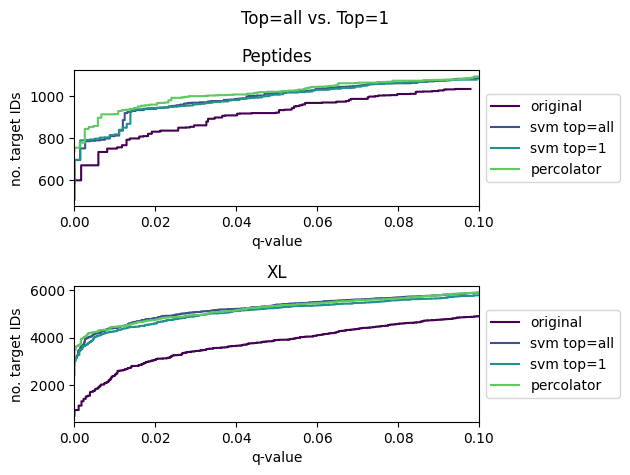

In [415]:
fig, axs = plt.subplots(len(np.unique(df_original[dataset[i]['group']])))
for j in np.unique(df_original[dataset[i]['group']]):
    df_svm = dfs_svm[0]
    axs[j].step(df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_original.loc[(df_original[dataset[i]['group']]== j) & (df_original['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"original")
    axs[j].step(df_not_reranked.loc[(df_not_reranked[dataset[i]['group']]== j) & (df_not_reranked['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_not_reranked.loc[(df_not_reranked[dataset[i]['group']]== j) & (df_not_reranked['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"svm top=all")
    axs[j].step(df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_svm.loc[(df_svm[dataset[i]['group']]== j) & (df_svm['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"svm top=1")
    axs[j].step(df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_perc.loc[(df_perc[dataset[i]['group']]== j) & (df_perc['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"percolator")
    axs[j].set_xlim(0,0.1)
    axs[j].set_xlabel("q-value")
    axs[j].set_ylabel("no. target IDs")
    lgd = axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_title(f"Peptides")
axs[1].set_title(f"XL")
fig.suptitle('Top=all vs. Top=1')
fig.tight_layout()
#plt.savefig(f"../results/{dataset[i]['type']}/{dataset[i]['name']}.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Other

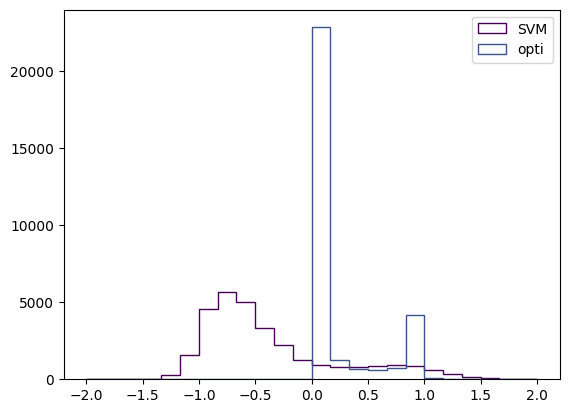

In [416]:
bins = np.linspace(-2,2,25)
plt.hist(df_svm.loc[:, 'Score'], label = 'SVM', histtype='step', bins=bins)
plt.hist(df_perc.loc[:, 'Score'], label='opti', histtype='step', bins = bins)
plt.legend()
plt.show()

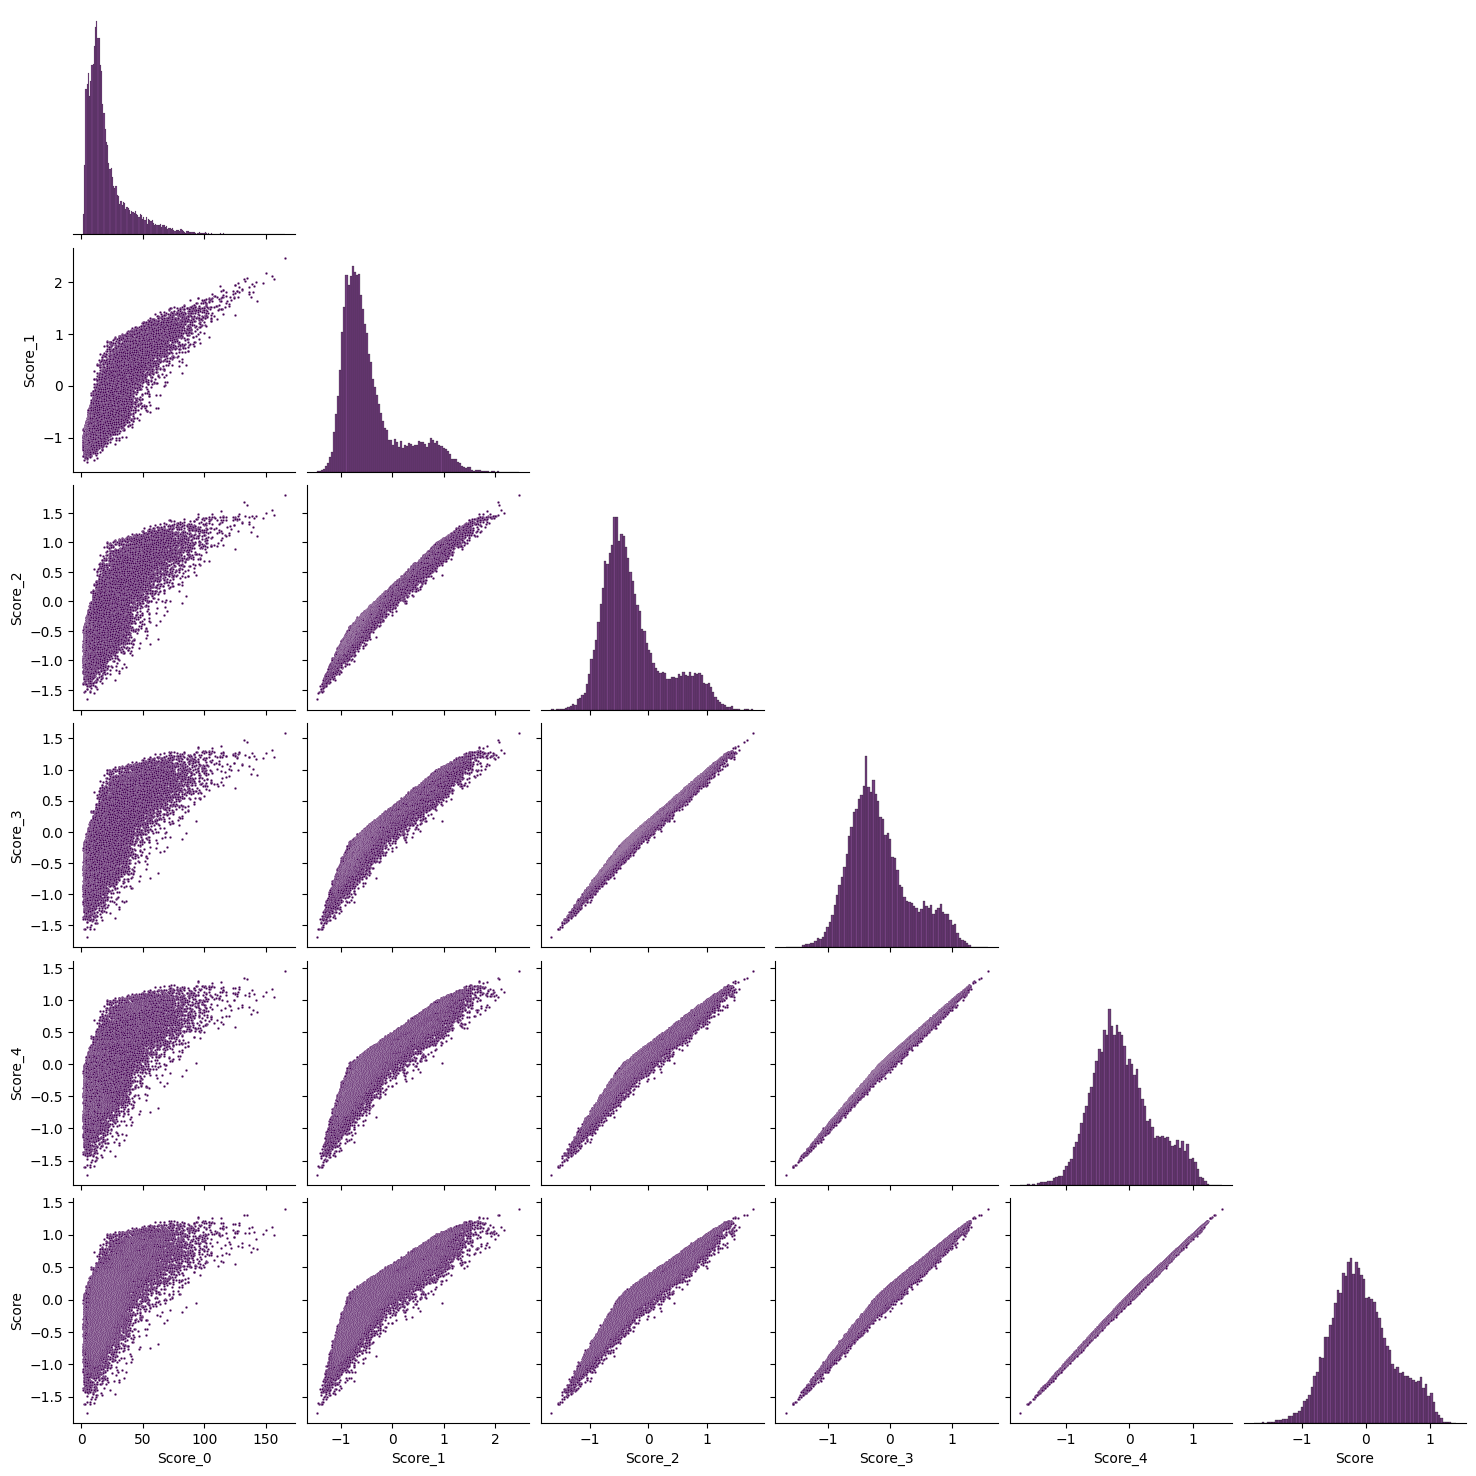

In [417]:
import seaborn as sns
sns.pairplot(dfs_svm[len(dfs_svm) -1].loc[:,['Score_0', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score']], plot_kws={"s": 3}, corner=True)